In [1]:
import numpy as np
import math as math
import matplotlib.pyplot as mpl
from scipy.misc import imread
%matplotlib inline


In [18]:
def mig(data,vel,dt,dx,dy=0,dz=0,t0=0,x0=0,z0=0,y0=0,nz=0,ny=0):
    nt = len(data)
    nx = len(data[1])
    if nz==0:
        nz = nt
        
    if ny == 0:
        ny = nx
    
    if dy == 0:
        dy=dx
        
    if dz == 0:
        dz = dt*vel
                
    global image
    image = np.zeros((nz,ny))
    # loop through indexes
    ix = 0
    while ix<nx:
        x = x0+ix*dx
        iy = 0

        while iy<ny:
            y = y0 + iy*dy
            h = (x-y)
            iz = 0
            while iz<nz:
                z = z0+iz*dz
                t = math.sqrt(z*z+h*h)*2./vel
            
            
                t1 = (t-t0)/dt
                ti = math.floor(t1)
                rt = t1-ti
                ti = int(ti)

                if ti>nt-2:
                    iz=iz+1
                    continue

                else:
                    image[iz,iy] = image[iz,iy] + (1-rt)*data[ti,ix] + rt*data[ti+1,ix]

                    iz = iz+1
    
            iy = iy+1
            #iy
    
        ix=ix+1
        #ix
    return

In [28]:
def mod(image,vel,dz,dy,dx=0,dt=0,t0=0,x0=0,z0=0,y0=0,nt=0,ny=0):
    nz = len(image)
    ny = len(image[1])
    if nt==0:
        nt = nz
        
    if ny == 0:
        ny = nx
    
    if dy == 0:
        dy=dx
        
    if dt == 0:
        dt = dz/vel
    
    global data
    data = np.zeros((nt,nx))    
    
    # loop through indexes
    ix = 0
    while ix<nx:
        x = x0+ix*dx
        iy = 0

        while iy<ny:
            y = y0 + iy*dy
            h = (x-y)
            iz = 0
            while iz<nz:
                z = z0+iz*dz
                t = math.sqrt(z*z+h*h)*2./vel
            
            
                t1 = (t-t0)/dt
                ti = math.floor(t1)
                rt = t1-ti
                ti = int(ti)

                if ti>nt-2:
                    iz=iz+1
                    continue

                else:
                    data[ti,ix] = data[ti,ix] + (1-rt)*image[iz,iy]
                    data[ti+1,ix] = data[ti+1,ix] + rt*image[iz,iy]

                    iz = iz+1
    
            iy = iy+1
            #iy
    
        ix=ix+1
        #ix
    return
    


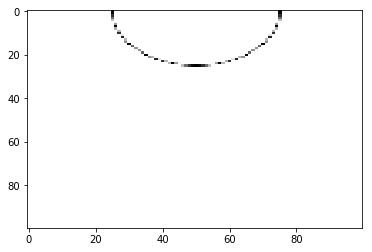

In [47]:
t0 = 0.
nt = 100
dt = .05
nx = 100
dx = 50
x0 = 0.

# velocity
vel = 1000 #km/s

# image domain parameters

dz = dt*1000
dy = dx
data = np.zeros((nt,nx))
data[nt/2,nx/2]=1.

mig(data,vel,dt,dx,dy,dz)

mpl.imshow(image, aspect='auto', cmap="Greys")

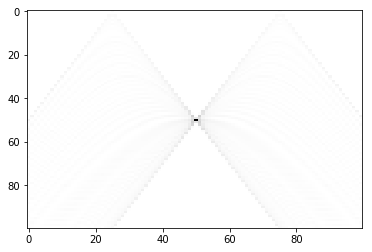

In [48]:
mod(image,vel,dz,dy,dx,dt)

mpl.imshow(data, aspect='auto', cmap="Greys")

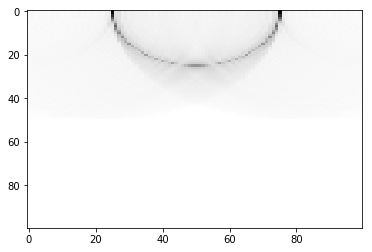

In [49]:
mig(data,vel,dt,dx,dy,dz)
mpl.imshow(image, aspect="auto", cmap="Greys")

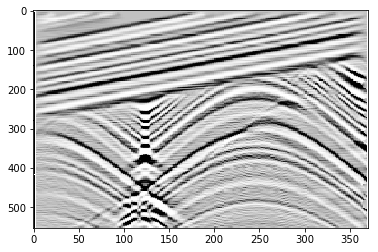

In [50]:
data = imread("kfgood_data.png",flatten="true")
mpl.imshow(data, aspect="auto", cmap="Greys")

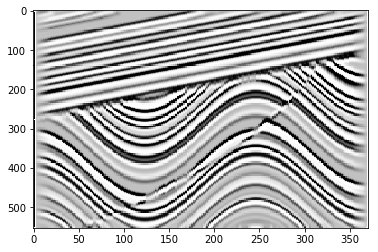

In [52]:
image = imread("kfgood_image.png",flatten="true")
mpl.imshow(image, aspect="auto", cmap="Greys")